<center>
<img src="./images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de Pattern Classsification Duda, Hart, Stork. Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.

# IntML2020 - Teoría Bayesiana - Distribuciones Normales Bivariadas

Puede ayudarse con la siguientes paginas 

https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split
from matplotlib.patches import Ellipse
import numpy as np
from scipy.stats import norm, multivariate_normal
from scipy.special import factorial
from numpy.linalg import inv, det, cholesky, eigh
from numpy.linalg import norm as norm_
from random import random

<br>

# Ejercicio 1
En muchos problemas de clasificacion de patrones se tiene la opcion de asignar un
 patron a una de $c$ clases, o de rechazarlo como irreconocible. Si el costo de
 hacer esto ultimo no es demasiado alto, puede ser una accion deseable. Sea

  $$\lambda(\alpha_i|\omega_j)=\left\{\begin{array}{ccc}
 0& \ &\mbox{ si }i=j, \ i,j=1,2,\ldots,c\\
 \lambda_r&&\mbox{ si }i=c+1\\
 \lambda_s&&\mbox{ en otro caso}\\
\end{array}\right.$$

 donde $\lambda_r$ es la pérdida sufrida por la eleccion de rechazarlo, y $\lambda_s$ es la
 pérdida incurrida por cometer un error. Mostrar que el riesgo mínimo se obtiene
 si decidimos $\omega_i$ si $P(\omega_i|x)\geq P (\omega_j|x)$ para todo $j$, y si $P(\omega_i|x)\geq 1-\frac{\lambda_r}{\lambda_s}$, caso contrario, rechazar. ¿Que sucede si $\lambda_r= 0$? ¿Que sucede si $\lambda_r>\lambda_s$?.
 


 # *Respuesta*   <font color = 'RED'> estudiar esta respuesta </font>

Tenemos que el riesgo total se minimiza si minimizamos cada $R(\alpha_i|x)$. 

El valor de $R(\alpha_i | x)$ para $1  \le i \le c$ está dado por: 
$$R(\alpha_i | x) = \sum_{j=1}^c \lambda(\alpha_i | \omega_j) P(\omega_j|x) = \sum_{j=1, j\neq i}^c \lambda_s P(\omega_j|x) = \lambda_s (1-P(\omega_i | x)),$$
y $$R(\alpha_{c+1} | x) = \sum_{j=1}^c \lambda(\alpha_{c+1} | \omega_j) P(\omega_j|x) = \lambda_r \sum_{j=1}^c P(\omega_j|x) =  \lambda_r.$$
Para $1 \le i\le c$, el riesgo se minimiza si $P(\omega_i|x)$ es máximo en el conjunto de los $P(\omega_j|x)$, ya que $\lambda(\omega_i|\omega_i) = 0$.

Ahora, $R(\alpha_i |x)\le R(\alpha_{c+1}|x)$ si y sólo si 
$$\lambda_s (1-P(\omega_i|x)) \le \lambda_r \qquad \mbox{si y sólo si} \qquad 1-P(\omega_i|x) \le \frac{\lambda_r}{\lambda_s}\qquad \mbox {si y sólo si} \qquad P(\omega_i|x) \ge 1-\frac{\lambda_r}{\lambda_s}$$

Si $\lambda_r = 0$, entonces por lo que acabamos de ver el riesgo total se minimiza si se rechaza en todos los casos.

Si $\lambda_r>\lambda_s$, entonces en ningún caso conviene rechazar puesto que $1-\frac{\lambda_r}{\lambda_s} < 0$.


# Ejercicio 2.
Considere el problema de clasificacion con la opcion de rechazo como irreconocible.

* (a)  Utilice los resultados del ejercicio anterior para demostrar que las siguientes funciones discriminantes son optimas para este tipo de problemas:

$$g_i(x)=\left\{\begin{array}{ccc}
 p(x|\omega_i)P(\omega_i)& \ &\mbox{ si }i=1,2,\ldots,c\\
 \displaystyle\frac{\lambda_s-\lambda_r}{\lambda_s}\displaystyle\sum_{j=1}^cp(x|\omega_j)P(\omega_j)&&\mbox{ si }i=c+1\\
\end{array}\right.$$

* (b) Grafique esta funcion discriminante y las regiones de decision para el caso del problema unidimensional con dos clases, teniendo

    * $x|\omega_1\sim \mathcal{N}(1, 1)$,
    *  $x|\omega_2\sim \mathcal{N}(-1,1)$,
    * $P(\omega_1) =P(\omega_2)=\displaystyle\frac12$, y
    * $\displaystyle\frac{\lambda_r}{\lambda_s}=\displaystyle\frac14$

* (c) Describa cualitativamente lo que sucede cuando $\displaystyle\frac{\lambda_r}{\lambda_s}$ se incrementa de $0$ a $1$.
* (d) Repita el procedimiento para el caso

    * $x|\omega_1\sim \mathcal{N}(1, 1)$,
    * $x|\omega_2\sim \mathcal{N}\left(0,\displaystyle\frac14\right)$,
    * $P(\omega_1)=\displaystyle\frac13$, $P(\omega_2)=\displaystyle\frac23$, y
    * $\displaystyle\frac{\lambda_r}{\lambda_s}=\displaystyle\frac12$



 # *Respuesta*   <font color = 'RED'> estudiar esta respuesta </font>



* (a) Según esta función discriminante, dada la característica $x$ se elige la clase $\omega_i$ si 

$$
p(x|\omega_i)P(\omega_i) \ge p(x|\omega_j)P(\omega_j)  \qquad (1)
$$ 

para $j\neq i$ y además no se la rechaza, es decir:

$$\lambda_s p(x|\omega_i)P(\omega_i) \ge (\lambda_s-\lambda_r)\displaystyle\sum_{j=1}^cp(x|\omega_j)P(\omega_j)\qquad (2).$$


Dividiendo por $p(x)$ (asumiendo que no es $0$, y si no también es cierto), tenemos que $(1)$ equivale a 

$$P(\omega_i | x) \ge P(\omega_j|x), \qquad i \neq j, \qquad (3).$$


Simplificando en $(2)$ en ambos miembros de la desigualdad el término 
$\lambda_s p(x|\omega_i)P(\omega_i)$ y observando que la sumatoria $\displaystyle\sum_{j=1}^c p(x|\omega_j)P(\omega_j) = p(x)$, tenemos que la función no rechaza la clase $\omega_i$ si 

$$\lambda_s \sum_{j\neq i}^c p(x|\omega_j)P(\omega_j) = \lambda_s (p(x)-p(x |\omega_i)P(\omega_i)) \le \lambda_r p(x). \qquad (4)$$


Dividiendo por $p(x)$  y observando que $p(x |\omega_j)P(\omega_j) = P(\omega_j|x)p(x)$ concluimos de $(3)$ y $(4)$ que $g_i(x)$ clasifica en $\omega_i$ si


$$P(\omega_i|x) \ge P(\omega_j|x), \quad \mbox{para }{j \neq i} \quad \mbox{ y } \quad
P(\omega_i|x)) \ge 1-\frac{\lambda_r}{\lambda_s}.$$


Luego esta función discriminante produce la elección de la clase $\omega_i$ que produce el riesgo mínimo, según lo probado en el Ejercicio 1.

 <span style="color:green"> RESPUESTA</span>
 * (b)

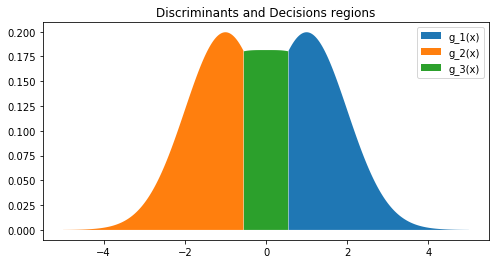

In [2]:
lambdas = 0.25
x = np.linspace(-5, 5, 1000)
priori_omega_1, priori_omega_2 = 0.5, 0.5

def g_1(x):
    return priori_omega_1*norm.pdf(x, loc=1)

def g_2(x):
    return priori_omega_2*norm.pdf(x, loc=-1)

def g_3(x):
    return (1 - lambdas)*(g_1(x) + g_2(x))

plt.figure(figsize=(8,4))
plt.plot(x, g_1(x), alpha=0)
plt.plot(x, g_2(x), alpha=0)
plt.plot(x, g_3(x), alpha=0)
plt.fill_between(x, g_1(x), 0, where=g_1(x) > g_3(x), label='g_1(x)')
plt.fill_between(x, g_2(x), 0, where=g_2(x) > g_3(x), label='g_2(x)')
plt.fill_between(x, g_3(x), 0, where=(g_3(x) > g_1(x)) == (g_3(x) > g_2(x)),
                 label='g_3(x)')
plt.title('Discriminants and Decisions regions')
plt.legend();

 <span style="color:green"> RESPUESTA </span>
 
 * (c)
 
Si $\dfrac{\lambda_r}{\lambda_s} \rightarrow 1$ entonces $P(\omega_i|x)) \ge 1-\frac{\lambda_r}{\lambda_s}$ se cumple facilmente y la decisión por $\omega_i$ recae sobre las probabilidades a posteriori, ya que resta ver que se cumpla $P(\omega_i|x) \ge P(\omega_j|x)$ (La regla se convirtió en la regla de Bayes).
 
Si $\dfrac{\lambda_r}{\lambda_s} = 0$ entonces $P(\omega_i|x)) \ge 1 $ nunca se va cumplirá y por lo tanto siempre voy a rechazar. 

 <span style="color:green"> RESPUESTA </span>
 
 * (d) 

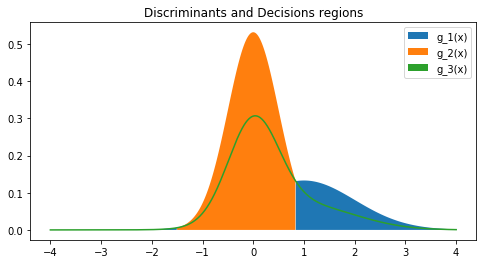

In [3]:
lambdas = 0.5
x = np.linspace(-4, 4, 1000)
priori_omega_1, priori_omega_2 = 1/3, 2/3

def g_1(x):
    return priori_omega_1*norm.pdf(x, loc=1)

def g_2(x):
    return priori_omega_2*norm.pdf(x, loc=0, scale=0.5)

def g_3(x):
    return (1 - lambdas)*(g_1(x) + g_2(x))

plt.figure(figsize=(8,4))
plt.plot(x, g_1(x), alpha=0)
plt.plot(x, g_2(x), alpha=0)
plt.plot(x, g_3(x))
plt.fill_between(x, g_1(x), 0, where=g_1(x) > g_3(x), label='g_1(x)')
plt.fill_between(x, g_2(x), 0, where=g_2(x) > g_3(x), label='g_2(x)')
plt.fill_between(x, g_3(x), 0, where=(g_3(x) > g_1(x)) == (g_3(x) > g_2(x)),
                 label='g_3(x)')
plt.title('Discriminants and Decisions regions')
plt.legend();


# Ejercicio 3. 

Verifique que en el caso Normal bivariado , asumiendo clases equiprobables y la misma matriz de varianza covarianza, vale: 

* a) Si $\Sigma=\sigma^2 I$, maximizar $g_i({\bf x})$ implica minimizar la distancia euclidea entre ${\bf x}$ y ${\bf \mu_i}$,


* b) Si $\Sigma$ no diagonal, maximizar $g_i({\bf x})$ implica minimizar la distancia de Mahalanobis entre ${\bf x}$ y ${\bf \mu_i}$. 


* c) En una tarea de clasificacion de dos clases con dos caracteristicas, los vectores son generados por distribuciones normales que comparten la misma matriz de covarianza ${\bf x}|\omega_1\sim \mathcal{N}(\mathbf{0},\left(\begin{array}{cc}
1.1&0.3\\
 0.3& 1.9\end{array}\right))$, ${\bf x} |\omega_2\sim \mathcal{N}\left(\left(\begin{array}{c}
 3\\ 3\end{array}\right),\left(\begin{array}{cc}
1.1&0.3\\
 0.3& 1.9\end{array}\right)\right)$. Clasifique el vector $(1,2.2)$ acorde con el clasificador Bayesiano. Coincide dicha clase con la clase cuya media es la más cercana (usando la distancia Euclidea)?


* d) Compute los ejes principales del elipse centrado en (0,0) que corresponde a la distanca de Mahalanobis $dm= \sqrt{ 2.952}$ del centro. 





 # *Respuesta*   <font color = 'RED'> estudiar esta respuesta </font>



a) Para el caso normal **multivariado**, se tiene que 
$$g_i(x) = \left( (2\pi)^k \det(\Sigma)\right)^{-1/2} \exp\left(-\frac 12(x-\mu)'\Sigma^{-1}(x-\mu)\right)\cdot P(\omega_i).$$
Tomando logaritmos resulta:
$$\log g_i(x) = -\frac k2 \log(2\pi) -\frac {\log(\det(\Sigma))}2 - \frac 12(x-\mu)'\Sigma^{-1}(x-\mu)+\log P(\omega_i).$$
Eliminando los términos que son iguales para todas las clases, sólo queda el término que incluye a la media $\mu$. Luego podemos tomar la función discriminante como:
$$g_i(x) = -(x-\mu)'\Sigma^{-1}(x-\mu) = \sigma^{-2}  (x-\mu)'(x-\mu).$$
Luego multiplicando por $\sigma^2$ y calculando la raíz cuadrada resulta $$g_i(x) = -||x-\mu||_2,$$ el opuesto de la distancia euclídea.
Así, como el clasificador clasifica en la clase $i$ si $g_i(x)$ es máximo, esto es equivalente a que la distancia euclídea sea mínima.


 <span style="color:green"> RESPUESTA </span>
 
 * (b)
 
 De igual manera para este caso se tiene como discriminante para la clase $i$ a:
 
 $$g_i(x) = \left( (2\pi)^k \det(\Sigma)\right)^{-1/2} \exp\left(-\frac 12(x-\mu)'\Sigma^{-1}(x-\mu)\right)\cdot P(\omega_i).$$
 
 Tomando logaritmos resulta: 
 
 $$\log g_i(x) = -\frac k2 \log(2\pi) -\frac {\log(\det(\Sigma))}2 - \frac 12(x-\mu)'\Sigma^{-1}(x-\mu)+\log P(\omega_i).$$
 
 De igual forma se eliminan $\dfrac {\log(\det(\Sigma))}2$  y $\dfrac k2 \log(2\pi)$ por ser iguales para todas las clases y por el supuesto de que las probabilades a priori son iguales también se elimina el último término. Tras multiplicar por $2$ el clasificador nos queda:
     
     $$g_i(x) = -(x-\mu)'\Sigma^{-1}(x-\mu).$$
     
que es el opuesto al **cuadrado** de la *distancia de Mahalanobis* de $x$ a $\mu$. Como el clasificador clasifica en la clase $i$ si $g_i(x)$ es máximo, esto es equivalente a que la distancia de Mahalanobis sea mínima.

 <span style="color:green"> RESPUESTA </span>
 
 * (c)

In [4]:
sigma = np.array([[1.1, 0.3], [0.3, 1.9]])
sigma_inv = inv(sigma) 

mu_1 = [0, 0] 
mu_2 = [3, 3]

def discriminat(x, mu):
    prod = np.dot((x - mu).T, sigma_inv)
    return -np.dot(prod, (x - mu))

def dichotomizer(x):
    if discriminat(x, mu_1) > discriminat(x, mu_2):
        return 1
    else: 
        return 2

vector =  np.array([1, 2.2])
g_1 = discriminat(vector, mu_1)
g_2 = discriminat(vector, mu_2)
print('El discriminante:')
print('\t * para la Primera clase da: %0.3f' % g_1)
print('\t * para la Segunda clase da: %0.3f' % g_2)
category = dichotomizer(vector)
print()
print('El vector [1, 2.2] pertence a la clase:',  category)

El discriminante:
	 * para la Primera clase da: -2.952
	 * para la Segunda clase da: -3.672

El vector [1, 2.2] pertence a la clase: 1


In [5]:
def euclidean_distance(x, mu):
    return np.sqrt(np.dot((x-mu).T, (x-mu)))

distance_1 = euclidean_distance(vector, mu_1)
distance_2 = euclidean_distance(vector, mu_2)

print('La distancia euclideana:')
print('\t * para la Primera clase es: %0.3f' % distance_1)
print('\t * para la Segunda clase da: %0.3f' % distance_2)

La distancia euclideana:
	 * para la Primera clase es: 2.417
	 * para la Segunda clase da: 2.154


Se observa que la categoria elegida por el clasificador **no** coincide con la clase que tiene la distancia euclidea mas cercana a su media.

<span style="color:red"> ESTUDIAR ESTA RESPUESTA Y COMPLETAR!!!</span>

d) La elipse con centro en $(0,0)$ y radio $r$ se corresponde a la ecuación 
$$\frac{x^2}{a^2} + \frac{y^2}{b^2} = r^2,$$
donde $a$ y $b$ son las semilongitudes de los ejes de la elipse. 

### Cálculo de la elipse

La distancia de Mahalanobis para una matriz $\Sigma^{-1} = \left(\begin{array}{cc}u & v \\ v & w \end{array}\right)$ al punto $(0,0)$ resulta:
$$d_M^2 ((x,y), (0,0)) = (x,y)' \Sigma^{-1} (x,y) = u x^2 + 2 v xy + wy^2. \qquad \qquad (1)$$

Queremos encontrar los ejes de la elipse dada por $d_M ((x,y), (0,0))= \sqrt{2.952}$.
Dado que si $v\neq 0$ es porque se trata de una elipse rotada, analizamos la elipse canónica:
$$\frac{\tilde x^2}{a^2} + \frac{\tilde y^2}{b^2} = r^2 = 2.952.$$
Escribimos 
$$\begin{cases}
\tilde x &= x \cos \theta - y \sin\theta \\
\tilde y &= x \sin \theta + y \cos\theta
\end{cases}
= Q \cdot \left(\begin{array}{c}x \\ y \end{array}\right), \qquad \mbox{es decir} \qquad \left(\begin{array}{c}x \\ y \end{array}\right) = Q^{-1} \left(\begin{array}{c}\tilde x \\ \tilde y \end{array}\right)
$$
donde $Q$ es la matriz de rotación.
Reemplazando $\tilde x$ y $\tilde y$ en la ecuación de la elipse resulta:
\begin{eqnarray}
\frac 1{a^2} \tilde x^2 &=& \frac 1{a^2}\left(x^2 \cos^2 \theta -2xy \sin\theta\cos\theta + y^2 \sin^2 \theta\right)\\
\frac 1{b^2} \tilde y^2 &=& \frac 1{b^2}\left(x^2 \sin^2 \theta +2xy \sin\theta\cos\theta + y^2 \cos^2 \theta\right)\\
\mbox{sumamos} & &\\
r^2 &= &x^2(\frac 1{a^2} \cos^2 \theta + \frac 1b\sin^2 \theta) + 2xy(\frac 1{b^2}-\frac 1{a^2})\sin\theta\cos\theta + y^2(\frac 1{a^2}\sin^2\theta + \frac 1{b^2}\cos^2\theta)
\end{eqnarray}

De aquí resulta, volviendo a la fórmula $(1)$:
$$
\begin{cases}
u &= \frac 1{a^2} \cos^2 \theta + \frac 1{b^2}\sin^2 \theta\\
w &= \frac 1{a^2}\sin^2\theta + \frac 1{b^2}\cos^2\theta\\
v &= (\frac 1{b^2}-\frac 1{a^2})\sin\theta\cos\theta
\end{cases}
$$

Operando con estas ecuaciones obtenemos:
$$u+ w = \frac{1}{a^2} + \frac{1}{b^2}, \qquad 
w-u = (\frac{1}{b^2}-\frac 1{a^2}) \cos2\theta, \qquad \qquad 2v = (\frac{1}{b^2}-\frac 1{a^2}) \sin 2\theta$$.

(Se usaron las identidades: 
$$cos(2\theta) = cos(\theta+\theta) = cos(\theta)cos(\theta) - sin(\theta)sin(\theta)  = cos^2(\theta) - sin^2(\theta)$$ $$sin(2\theta) = sin(\theta+\theta) = sin(\theta)cos(\theta) + sin(\theta)cos(\theta)  = 2sin(\theta)cos(\theta)$$)

Así los ejes principales de la elipse están en la dirección rotada por el ángulo $\theta$ de $(1,0)$ y $(0,1)$ respectivamente.

Luego $\tan 2\theta = \frac {2v}{w-u}$, es decir $$\theta = \frac 12 \tan^{-1} \frac {2v}{w-u}.$$


### Especificamos en el ejemplo

$$\Sigma^{-1} = \left(\begin{array}{cc}0.95 & -0.15 \\ -0.15 & 0.55 \end{array}\right).$$
Así tenemos que 
$$\tan 2\theta = -\frac{0.3}{-0.4} = 0.75, $$

<span style="color:green">RESPUESTA </span>

In [6]:
sigma_inv # ya lo teniamos de antes
v = sigma_inv[0, 1]
u = round(sigma_inv[0, 0], 3)
w = sigma_inv[1, 1]

a = 2
b = 5
tan_2theta = 2*v/(w-u)
_2theta = np.arctan(tan_2theta)
theta = _2theta/2
print('La matriz de covarianza:')
print(sigma_inv)
print()
print('La tangente de 2theta:')
print(round(tan_2theta, 2))

La matriz de covarianza:
[[ 0.95 -0.15]
 [-0.15  0.55]]

La tangente de 2theta:
0.75


Tenemos $$
\begin{cases}
\frac 1{a^2} + \frac 1{b^2} &= 0.95 + 0.55 = 1.5, \\
\frac{1}{b^2}- \frac 1{a^2}  &= \frac {-0.4}{0.949}
\end{cases}
$$

<span style="color:green"> RESPUESTA </span>

In [7]:
summ = u + w
diff = (w - u)/np.cos(_2theta)
print('La suma de 1/a^2 + 1/b^2 es:', summ)
print('La resta de 1/b^2 - 1/a^2 es:', round(diff, 4))

La suma de 1/a^2 + 1/b^2 es: 1.5
La resta de 1/b^2 - 1/a^2 es: -0.5


Luego la elipse no rotada es:
$$\frac {\tilde x^2}{1^2} + \frac{\tilde y^2}{(\sqrt 2)^2} = 2.952 = r^2.$$
Las longitudes de los ejes son:
$$ a_1 = \sqrt{2.952}, \qquad b_1 = \sqrt{2 \cdot 2.952}$$

<span style="color:green">RESPUESTA</span>

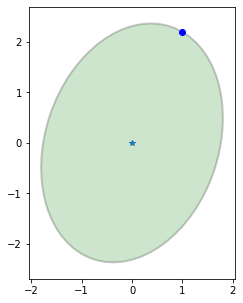

In [8]:
def plot_ellipse(ax, mean, cov, x):
    inv_cov = inv(cov)
    sqr_maha = (x-mean).dot(inv_cov).dot(x-mean)
    a = np.sqrt(sqr_maha)*2
    b = np.sqrt(2 * sqr_maha)*2
    v = inv_cov[0, 1]
    u = inv_cov[0, 0]
    w = inv_cov[1, 1]
    tan_2theta = (2*v)/(w-u)
    theta = 0.5*np.arctan(tan_2theta)
    theta = (180 * theta) / np.pi
    ellipse = Ellipse(mean, a, b, facecolor='green',
                      edgecolor='black', linewidth=2, 
                      angle=-theta)
    ellipse.set_alpha(0.2)
    ax.add_patch(ellipse)
    ax.plot(mean[0], mean[1], '*')
    ax.plot(x[0], x[1], 'bo');

fig, ax = plt.subplots(figsize=(9, 5), subplot_kw={'aspect': 'equal'})
plot_ellipse(ax, mu_1, sigma, vector)

# Ejercicio 4. 

* (a) Describa un procedimiento para generar muestras aleatorias de acuerdo a una distribucion normal
$\mathcal{N}_d(\mu,\Sigma)$ (donde $d$ son las dimensiones), y un código Python (puede usar algun paquete). 


* (b) Describa un procedimiento que calcule la funcion discriminante para una distribucion normal dada y probabilidad a priori $P(\omega_i)$, y un código Python (puede usar algun paquete).


* (c) Describa un procedimiento que calcule la distancia euclidea entre dos puntos arbitrarios.


* (d)  Escriba un procedimiento que calcule la distancia de Mahalanobis entre la media $\mu$ y un punto arbitrario $x$, dada la matriz de covarianza $\Sigma$.

Puede usar 

https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py



# *Respuesta*

 <span style="color:green"> RESPUESTA </span>
 
 * (a)

Para generar un vector normal multivariado $\textbf{X} = (X_1, X_2,..., X_n)$ dado un vector de medias $\mu$ y una matriz de covarianza $\Sigma$ tal que $\Sigma = A^{'}A$ se deben generar normales independientes estándares $Z_1, Z_2,..., Z_n$ y hacer: $$\textbf{X} = AZ^{'} + \mu$$

Para encontrar una matriz $A$ que cumpla con lo que pedido, podemos usar la descomposición de Cholesky, que establece que para cualquier matriz $M$ simétrica $n \times n$ y definida positiva, hay una matriz $n \times n$ triangular inferior $A$ tal que $M = AA^{'}$. Debido a que la matriz de covarianza $\Sigma$ es simétrica pues 
$Cov(X_i, X_j) = Cov(X_j, X_i))$ y como asumiremos que es definida positiva (como es usualmente el caso) se puede usar la descomposición de Cholesky.

In [9]:
def generate_multivariate_normal(mu, sigma, size):
    """
    It generates a random sample of multivariate normal vectors.
    Params:
    * mu: the vector of means.
    * sigma de covariance matrix.
    * size: the size of the sample.
    """
    dim = mu.shape[0]
    # Do factorisation
    A = np.linalg.cholesky(sigma)
    # Get dim*size Gaussian random variables (mean=0, variance=1)
    norm = np.random.normal(size=size*dim).reshape(size, dim)
    # Construct final set of random numbers (with correct mean)
    rand = A.dot(norm.T).T + mu
    return rand 

La librería ```numpy.random``` tiene un [generador](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.multivariate_normal.html) normales multivariadas. Lo comparamos con nuestro generador...

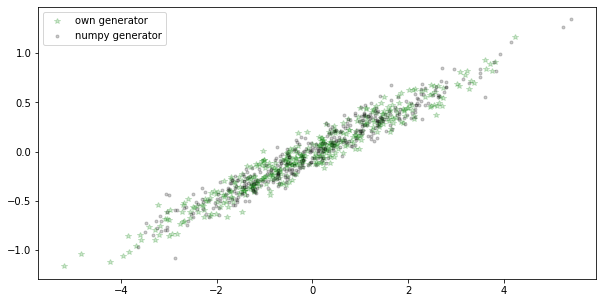

In [10]:
mu = np.array([0, 0])
sigma = np.array([[2.89, 0.68],[0.68, 0.17]])

X1 = generate_multivariate_normal(mu, sigma, 400)
X2 = np.random.default_rng().multivariate_normal(mu, sigma, 400)

plt.figure(figsize=(10, 5))
plt.plot(X1[:,0], X1[:,1], 'g*', alpha=0.2, label='own generator');
plt.plot(X2[:,0], X2[:,1], 'ko', alpha=0.2, ms=3, label='numpy generator')
plt.legend();

 <span style="color:green"> RESPUESTA </span>
 
 * (b)

El clasificador para la clase $i$ esta dado por:

$$g_i(x) = -\frac 12(x-\mu)'\Sigma^{-1}(x-\mu)-\dfrac{d}{2}\ln(2\pi) -\ln|\Sigma_i|
+ P(\omega_i)$$

Como no sabemos nada sobre el $\Sigma_i$ de las otras clases solo podemos eliminar el término $\dfrac{d}{2}\ln(2\pi)$ de la ecuación anterior. Entonces esto puede rescribirse como:

$$g_i(x) = x^{t}W_ix + w_i^{t}x + w_{i0}$$ donde 

$$W_i = -\dfrac{1}{2}\Sigma_i^{-1}$$

$$w_i = \Sigma_i^{-1}\mu_i$$ y

$$w_{i0} = -\dfrac{1}{2}\mu_i^{t}\Sigma_i^{-1}\mu_i -\dfrac{1}{2}\ln|\Sigma_i| + \ln P(\omega_i) $$

In [11]:
def generate_discriminat(mu_i, sigma_i, priori_i):
    """
    It generates a discriminant function for 
    multivariate normal densities
    Params:
    * mu: the mean column vector from the distribution.
    * sigma: the covariance matrix.
    * priori: the prior probability for the state.
    """
    inv_sigma_i = inv(sigma_i)
    det_sigma_i = det(sigma_i)
    W_i = -0.5*inv_sigma_i
    w_i = inv_sigma_i.dot(mu_i)
    w_i0 = -0.5*mu_i.T.dot(inv_sigma_i).dot(mu_i) - 0.5*np.log(det_sigma_i) + np.log(priori_i)
    return lambda x: x.T.dot(W_i).dot(x) + w_i.T.dot(x) + w_i0

 <span style="color:green"> RESPUESTA </span>

* (d)

In [12]:
def euclidean_distance(x_1, x_2):
    return np.sqrt(np.dot(x_1, x_2))

 <span style="color:green"> RESPUESTA </span>
 
 * (d)
 
 Formalmente, la distancia de Mahalanobis entre dos variables aleatorias $x$ e $y$ con la misma distribución de probabilidad y con matriz de covarianza $\Sigma$ se define como:

$$d_m(x, y) = \sqrt{(x-y)^{T}\Sigma^{-1}(x-y)}$$

In [13]:
def mahalanobis_distance(x, mu, sigma):
    inv_sigma = inv(sigma)
    return np.sqrt((x-mu).dot(inv_sigma).dot(x-mu))

# Ejercicio 5. 



* (a)  Utilice el codigo del problema anterior para simular dos normales $(X_1,X_2)$ con $\Sigma= C^T.C$, y $C= \left(\begin{array}{cc}
0&-0.23\\
 0.83& .23\end{array}\right)$ y vectores de media $\mu_1 =(0,0)$ y $\mu_2=(1,1)$ respectivamente. 
 
 
* (b) Supongamos que las probabilidades a priori de las dos primeras categorias son iguales ($P(\omega_1)=P(\omega_2)=\displaystyle\frac12$, diseñe y codifique  un clasificador para  dos categorias normales utilizando solo el valor de caracteristica $x_1$ especificada en el inciso anteiror. El código resultante debe poder clasificar una nueva muestra basado en esta información. 

Recuerde que para el diseño del clasificador se estimará la media y varianza a partir de los datos de cada una de las muestras. Si para la muestra $i$ la media y varianza son $\mu_i$ y $\sigma_i^2$ respectivamente, se clasificará un valor $x$ en la muestra $1$ si 
$$\frac 1{\sqrt{2\pi\sigma_1^2}} e^{-(x-\mu_1)^2/2\sigma_1^2}P(\omega_1) > \frac 1{\sqrt{2\pi\sigma_2^2}} e^{-(x-\mu_2)^2/2\sigma_2^2}P(\omega_2).$$
Tomando logaritmos, y eliminando las probabilidades a priori $P(\omega_i)$ por ser iguales esto es equivalente a decidir por la clase 1 si 
$$-\frac 12 \ln(2\pi) - \ln \sigma_1 - \frac{(x-\mu_1)^2}{2\sigma_1^2} > 
-\frac 12 \ln(2\pi) - \ln \sigma_2 - \frac{(x-\mu_2)^2}{2\sigma_2^2}$$
es decir, si 
$$ \ln \sigma_1 + \frac{(x-\mu_1)^2}{2\sigma_1^2} <  \ln \sigma_2 + \frac{(x-\mu_2)^2}{2\sigma_2^2}.$$



* (c) Determinar el error de entrenamiento empirico en sus muestras, es decir, el porcentaje de puntos mal clasificados, dividiendo el conjunto de $n=100$ muestras aleatoriamente en 80\% entrenamiento 20\% test. Repita incrementando los valores de $n$, $100\leq n\leq 10000$ en pasos de 100 y grafique el error empirico obtenido.


* (d) Utilice la cota de Bhattacharyya para acotar el error que obtendran los  patrones nuevos obtenidos muestreando las distribuciones.


* (e) Repita todo lo anterior, pero ahora utilice dos caracteristicas, $x_1$ y $x_2$.


* (f) Analice sus resultados. En particular, ¿es siempre posible para un conjunto finito de datos que  el error empirico pueda ser mayor al aumentar la dimension de los datos?.

# *Respuesta*

 <span style="color:green"> RESPUESTA </span>
 
 * (a)

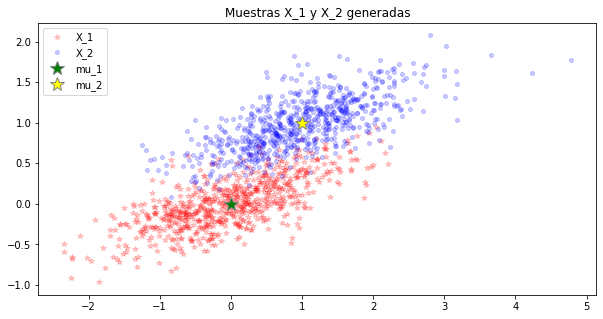

In [14]:
C = np.array([[0, -0.23], [0.83, .23]])
sigma = C.T.dot(C)
mu_1 = np.array([0, 0])
mu_2 = np.array([1, 1])

X_1 = generate_multivariate_normal(mu_1, sigma, 700)
X_2 = generate_multivariate_normal(mu_2, sigma, 700)

plt.figure(figsize=(10, 5))
plt.plot(X_1[:,0], X_1[:,1], 'g*', alpha=0.2, color='red', label='X_1');
plt.plot(X_2[:,0], X_2[:,1], 'ko', alpha=0.2, color='blue', ms=4, label='X_2')
plt.plot(mu_1[0], mu_1[1],'*', color='green', markersize=15, 
         markeredgecolor='grey', label='mu_1')
plt.plot(mu_2[0], mu_2[1],'*', color='yellow', markersize=15,
         markeredgecolor='grey', label="mu_2")
plt.title('Muestras X_1 y X_2 generadas')
plt.legend();

 <span style="color:green"> RESPUESTA </span>
 
 * (b)
 
 Por lo dicho en la consigna el clasificador decidirá por la clase $1$ si:

$$ \ln \sigma_1 + \frac{(x-\mu_1)^2}{2\sigma_1^2} <  \ln \sigma_2 + \frac{(x-\mu_2)^2}{2\sigma_2^2}.$$

y por la clase $2$ en caso contrario. A partir cada una de las muestras ```X_1``` y ```X_2``` geneneradas en el iniciso a) se estimarán la media y varianza, usando solo la primera cordenada correspondiente a la caracteristica $x_1$. Se programa el clasificador como un objetos con distintos métodos.

In [15]:
class ClassifierOneFeature(object):
    
    def __init__(self):
        pass
    
    def estimate(self, sample1, sample2):
        self.mu_1, self.mu_2 = np.mean(sample1), np.mean(sample2)
        self.std_1, self.std_2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)
    
    def classify(self, x):
        class_1 = np.log(self.std_1) + ((x-self.mu_1)**2)/(2*self.std_1**2)
        class_2 = np.log(self.std_2) + ((x-self.mu_2)**2)/(2*self.std_2**2)
        if class_1 < class_2:
            return 1
        else:
            return 2
    
    def predict(self, X):
        vclassify = np.vectorize(self.classify)
        y_predict = vclassify(X) 
        return y_predict

 <span style="color:green"> RESPUESTA </span>
 
 * (c)
 
Debemos generar muestras de tamaño $n$ tal que $n = 100$ al inicio, y aumentar el tamaño de la muestra en pasos de $100$ hasta llegar a $n = 10000$. 

En las muestras generadas tendremos varibles con las distribuciones de $X_1$ y de $X_2$ simuladas en el ejercicio anterior, en iguales proporciones (es decir, al inicio con $n=100$, tendremos 50 variables con la distribución de $X_1$ y 50 con la de $X_2$). Como el generador genera binormales y solo debemos trabajar con la característica $x_1$, nos quedamos con ese valor en cada caso. Despues dividimos la muestra en 80% de entrenamiento y 20% de test como se pide. Luego se entrena el clasificador y se mide la precisión obtenida. La siguiente funcion implementa esto dado un tamaño de muestra n. Además permite hacerlo lo mismo con el caso de querer trabajar con dos caracteristicas (ejercicio del siguiente inciso).

In [16]:
def sample_n_predictions(n, two_feat=False):
    half_sample = int(n/2) 
    X_1 = generate_multivariate_normal(mu_1, sigma, half_sample)
    X_2 = generate_multivariate_normal(mu_2, sigma, half_sample)
    if two_feat:
        X = np.r_[X_1, X_2]
    else:
        # Obtain the values for feature x_1
        sample1_x1 = X_1[:, 0]
        sample2_x1 = X_2[:, 0]
        # X is the vector with all the values
        X = np.r_[sample1_x1, sample2_x1]
    # y are the labels (1 or 2) for the values
    y = np.r_[np.ones(half_sample, dtype=np.int8),
              2*np.ones(half_sample, dtype=np.int8)]
    # Separete the X and y values for train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=123,
                                                    stratify=y)
    # Create our classifier
    if two_feat:
        classifier = ClassifierTwoFeature()
    else:
        classifier = ClassifierOneFeature()
    # X_train is not order after the split so we must order the values that have label 1
    # first and then those with label 2. Then we separate for estimate mu and std...
    half_train = int(half_sample*0.8/2)
    classifier.estimate(X_train[y_train.argsort()][:half_train], 
                        X_train[y_train.argsort()][half_train:])
    # Make prediction with our test sample
    predictions = classifier.predict(X_test)
    # Return the porcentage of error
    return zero_one_loss(y_test, predictions)

Utilizando la funcion anterior, obtenemos el error empírico para las muestras de distinto tamaño y graficamos.

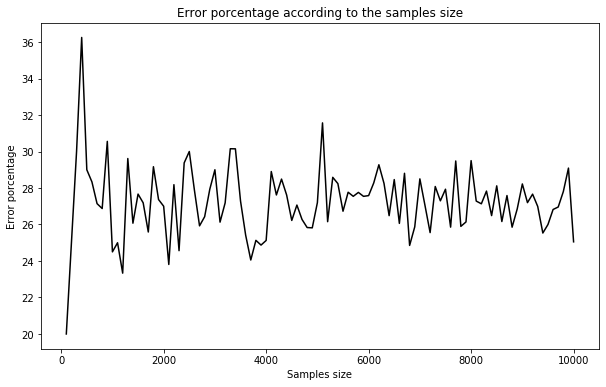

In [17]:
errors = []
x = np.linspace(100, 10000, 100)
for n in x:
    error = sample_n_predictions(n)
    errors.append(error*100)

plt.figure(figsize=(10, 6))
plt.plot(x, errors, 'k')
plt.title('Error porcentage according to the samples size')
plt.xlabel('Samples size')
plt.ylabel('Error porcentage');

 <span style="color:green"> RESPUESTA </span>
 
 Recordemos que para las variables simuladas teniamos $\mu_1 = 0, \mu_2 = 1$ y $\sigma^2_1 = 0.6889$.
 
 El límite de Bhattacharyya en este caso es: 
 
 $$\sqrt{P(\omega_1)P(\omega_2)} \int \sqrt{p(x|\omega_1)p(x|\omega_2)}dx =$$
 
 $$ \sqrt{P(\omega_1)P(\omega_2)} \int \left[\frac1{\sqrt{2\pi}\sigma_1} e^{-(x-\mu_1)^2/2\sigma_1^2}\right]^{1/2}\left[\frac1{\sqrt{2\pi}\sigma_1} e^{-(x-\mu_2)^2/2\sigma_1^2}\right]^{1/2} = $$
 
  $$ \sqrt{P(\omega_1)P(\omega_2)} \left[\frac1{\sqrt{2\pi}\sigma_1}\right] \int exp\left[-\frac{(x-\mu_1)^2}{4\sigma_1^2} - \frac{(x-\mu_2)^2}{4\sigma_1^2}\right] = 0.417$$
 
 Esto tambien puede resolverse usando la fórmula de analítica para calcular la cota.

In [18]:
def bahattacharyya_bound_one(mu_1, mu_2, 
                         sigma_1, sigma_2,
                         priori_1=0.5, priori_2=0.5):
    sum_sigmas = 0.5*(sigma_1+sigma_2)
    inv_sum_sigmas = sum_sigmas**-1
    sumand1 = 0.125*(mu_2 - mu_1)*(inv_sum_sigmas)*(mu_2 - mu_1)
    sumand2 = 0.5*np.log(sum_sigmas/np.sqrt(sigma_1*sigma_2)) 
    k_0_5 = sumand1 + sumand2
    return np.sqrt(priori_1*priori_2)*np.exp(-k_0_5)

In [19]:
bound = bahattacharyya_bound_one(0, 1, 0.6889, 0.6889)
# Se multiplica por 100 para comparar porcentajes con los porcentajes de error.
print('El límite de Bahattacharyya calculado es %2.3f' % (bound*100))

El límite de Bahattacharyya calculado es 41.703


 <span style="color:green"> RESPUESTA </span>
 
 Ahora trabajamos con las dos caracteristicas $x_1$ y $x_2$ de cada muestra. El clasificador debe adaptarse para trabajar con dos variables; Para el diseño del clasificador se estimará la media y matriz de covarianza a partir de los datos de cada una de las muestras. Luego, si para la muestra $i$ la media y matriz de covarianza son $\mu_i$ y $\Sigma_i$ respectivamente, se clasificará un valor $x$ en la muestra $1$ si 
 
$$\frac 1{(2\pi)|\Sigma_1|^{1/2}}exp\left[-\frac{1}{2}(x-\mu_1)^t\Sigma_1^{-1}(x-\mu_1)\right]P(\omega_1) > \frac 1{(2\pi)|\Sigma_2|^{1/2}}exp\left[-\frac{1}{2}(x-\mu_2)^t\Sigma_2^{-1}(x-\mu_2)\right]P(\omega_2).$$

Tomando logaritmos, y eliminando las probabilidades a priori $P(\omega_i)$ por ser iguales esto es equivalente a decidir por la clase 1 si 
$$-\ln(2\pi) - \frac 12\ln |\Sigma_1| -\frac{1}{2}(x-\mu_1)^t\Sigma_1^{-1}(x-\mu_1) > 
-\ln(2\pi) - \frac 12\ln |\Sigma_2| -\frac{1}{2}(x-\mu_2)^t\Sigma_2^{-1}(x-\mu_2) $$
es decir, si 
$$ \ln |\Sigma_1| + (x-\mu_1)^t\Sigma_1^{-1}(x-\mu_1) < \ln |\Sigma_2| + (x-\mu_2)^t\Sigma_2^{-1}(x-\mu_2).$$

Con este implementamos un clasificador, como en el caso anterior, con las variaciones que corresponden para el caso de las dos características. 

In [20]:
class ClassifierTwoFeature(object):
    
    def __init__(self):
        pass
    
    def estimate(self, sample1, sample2):
        self.mu_1, self.mu_2 = np.mean(sample1, axis=0), np.mean(sample2, axis=0)
        self.sigma_1 = np.cov(sample1, ddof=1, rowvar=False)
        self.sigma_2 = np.cov(sample2, ddof=1, rowvar=False)
        
    def classify(self, x):
        class_1 = np.log(det(self.sigma_1)) + (x-self.mu_1).dot(inv(self.sigma_1)).dot(x-self.mu_1)
        class_2 = np.log(det(self.sigma_2)) + (x-self.mu_2).dot(inv(self.sigma_2)).dot(x-self.mu_2)
        if class_1 < class_2:
            return 1
        else:
            return 2
    
    def predict(self, X):
        y_predict = np.apply_along_axis(self.classify, 1, X) 
        return y_predict

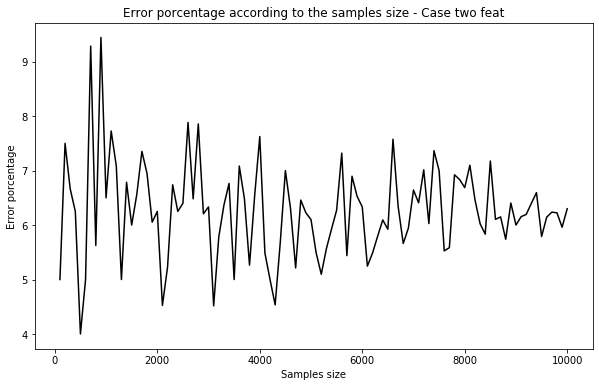

In [21]:
errors = []
x = np.linspace(100, 10000, 100)
for n in x:
    error = sample_n_predictions(n, two_feat=True)
    errors.append(error*100)

plt.figure(figsize=(10, 6))
plt.plot(x, errors, 'k')
plt.title('Error porcentage according to the samples size - Case two feat')
plt.xlabel('Samples size')
plt.ylabel('Error porcentage');

Para el caso de dos variables, hay una fórmula analítica para el límite de Bahattacharyaa. Usamos esta fórmula para y programamos un funcion para que la calcule...

In [22]:
def bahattacharyya_bound(mu_1, mu_2, 
                         sigma_1, sigma_2,
                         priori_1=0.5, priori_2=0.5):
    sum_sigmas = 0.5*(sigma_1+sigma_2)
    inv_sum_sigmas = inv(sum_sigmas)
    det_sum_sigmas = det(sum_sigmas)
    sumand1 = 0.125*(mu_2 - mu_1).dot(inv_sum_sigmas).dot(mu_2 - mu_1)
    sumand2 = 0.5*np.log(det_sum_sigmas/np.sqrt(det(sigma_1)*det(sigma_2))) 
    k_0_5 = sumand1 + sumand2
    return np.sqrt(priori_1*priori_2)*np.exp(-k_0_5)

In [23]:
bound = bahattacharyya_bound(mu_1, mu_2, sigma, sigma)
# Se multiplica por 100 para comparar porcentajes con los porcentajes de error.
print('El límite de Bahattacharyya calculado es %2.3f' % (bound*100))

El límite de Bahattacharyya calculado es 12.131


 <span style="color:green"> RESPUESTA </span>
 
 * (e) Por lo que se observa en los gráficos, el error se va reduciendo a medida que aumenta el tamaño de la muestra y nunca llega a ser tan grande como con las muestras mas chicas. En el experimento de dos variables se ve que la cota para el error calculada se cumple.

# Ejercicio 6. 

Considere el problema de clasificacion bidimensional en cuatro categorias con 
$$x|\omega_1\sim \mathcal{N}(\mathbf{0},\mathbf{I}),$$ 
$$x |\omega_2\sim \mathcal{N}\left(\left(\begin{array}{c}
 1\\
 1\end{array}\right),\mathbf{I}\right),$$ 
 $$x |\omega_3\sim \mathcal{N}\left(\left(\begin{array}{c}
 1\\
 -3\end{array}\right),\left(\begin{array}{cc}
 2&0.5\\
 0.5&2\end{array}\right)\right)$$ y $$x |\omega_4\sim \mathcal{N}\left(\left(\begin{array}{c}
 1\\
 2\end{array}\right),\left(\begin{array}{cc}
 5&4\\
 4&5\end{array}\right)\right)$$ y $P (\omega_i)=\displaystyle\frac14$ para todo i.
 
 * (a) ¿Cual es la distancia de Mahalanobis entre cada uno de los puntos $(1, 2)^T, (5, 3)^T, (0, 0)^T,
 (1, 0)^T$ y las medias de cada una de las clases.
 

* (b) Clasificar estos puntos.

* (c) Suponga que $P(\omega_1)=0.7$ y $P(\omega_2)=P(\omega_3)=P(\omega_4)=0.1$, y clasifique nuevamente los puntos.


Recuerde que como las clases son equiprobables, para clasificar los puntos se busca el máximo de los $g_i(x)$, con 
$$g_i(x) = -\ln(\det(\Sigma_i)) -  (x-\mu_i)'\Sigma_i^{-1}(x-\mu_i).$$


# *Respuesta*

 <span style="color:green"> RESPUESTA </span>
 
 * (a) 

In [24]:
# Set the values for all the classes
mu_1 = np.array([0, 0])
mu_2 = np.array([1, 1])
mu_3 = np.array([1, -3])
mu_4 = np.array([1, 2])

sigma_1 = np.eye(2)
sigma_2 = sigma_1.copy()
sigma_3 = np.array([[2, 0.5], [0.5, 2]])
sigma_4 = np.array([[5, 4], [4, 5]])

priori = 0.25

points = np.array([np.array([1,2]), np.array([5,3]), 
                   np.array([0,0]), np.array([1,0])])

mus = np.array([mu_1, mu_2, mu_3, mu_4])
sigmas = np.array([sigma_1, sigma_2, sigma_3, sigma_4])

def all_mahalanobis(points, mus, sigmas):
    distances = np.zeros((points.shape[0], mus.shape[0]))
    for i in range(distances.shape[0]):
        for j in range(distances.shape[1]):
            distances[i,j] = mahalanobis_distance(points[i], mus[j], sigmas[j])
    return distances

distances = all_mahalanobis(points, mus, sigmas)
for k in range(points.shape[0]):
    print('Las distancias de Mahalanobis para el punto son:', points[k])
    for h in range(distances.shape[1]):
        print('\t * para la clase %d: %0.3f' % (h+1, distances[k, h]))
    print()

Las distancias de Mahalanobis para el punto son: [1 2]
	 * para la clase 1: 2.236
	 * para la clase 2: 1.000
	 * para la clase 3: 3.651
	 * para la clase 4: 0.000

Las distancias de Mahalanobis para el punto son: [5 3]
	 * para la clase 1: 5.831
	 * para la clase 2: 4.472
	 * para la clase 3: 4.619
	 * para la clase 4: 2.427

Las distancias de Mahalanobis para el punto son: [0 0]
	 * para la clase 1: 0.000
	 * para la clase 2: 1.414
	 * para la clase 3: 2.477
	 * para la clase 4: 1.000

Las distancias de Mahalanobis para el punto son: [1 0]
	 * para la clase 1: 1.000
	 * para la clase 2: 1.000
	 * para la clase 3: 2.191
	 * para la clase 4: 1.491



 <span style="color:green"> RESPUESTA </span>  
 
 * (b) Usamos la función ```generate_discriminant``` que programamos en el **ejercicio 4 inciso b)** que nos genera el discriminante para cada clase. Luego programamos una función para clasifique un punto en alguna de las clases según la evalución del mismo en los discriminantes.

In [25]:
class ClasssifierBayesian(object):
    
    def __init__(self, mus, sigmas, probs):
        self.num_class = mus.shape[0]
        for k in range(self.num_class):
            discr = generate_discriminat(mus[k], sigmas[k], probs[k])
            name = 'g_' + str(k+1)
            setattr(self, name, (discr, k))
    
    def classify(self, x):
        evals = np.empty((self.num_class, 1))
        keys = list(classifier.__dict__.keys())
        keys.remove('num_class')
        for key in keys:
            discr = classifier.__dict__[key][0]
            _class = classifier.__dict__[key][1]
            evals[_class] = discr(x)
        return np.argmax(evals) + 1
    
    def predict(self, X):
        y_predict = np.apply_along_axis(self.classify, 1, X) 
        return y_predict

In [26]:
probs = [priori] * 4
classifier = ClasssifierBayesian(mus, sigmas, probs)
classifs = classifier.predict(points)

print('***Clasificaciones***:')
for point, _class in zip(points, classifs):
    print('\tEl punto [%d, %d] se clasifico en la categoria %d.' % (point[0], point[1], _class))

***Clasificaciones***:
	El punto [1, 2] se clasifico en la categoria 2.
	El punto [5, 3] se clasifico en la categoria 4.
	El punto [0, 0] se clasifico en la categoria 1.
	El punto [1, 0] se clasifico en la categoria 1.


 <span style="color:green"> RESPUESTA </span>  

* (c)

Para esta situación se tienen en cuenta además los pesos de cada clase. Luego se clasifica en la clase $i$ que maximiza $g_i$, con:
$$g_i(x) = -\frac 12 \ln(\Sigma_i) -\frac 12 dM(x,\mu_i) + \ln P(\omega_i).$$

In [27]:
# cambiamos las probabilidades
probs = [0.7, 0.1, 0.1, 0.1]
classifier = ClasssifierBayesian(mus, sigmas, probs)
classifs = classifier.predict(points)
print('***Clasificaciones***:')
for point, _class in zip(points, classifs):
    print('\tEl punto [%d, %d] se clasifico en la categoria %d.' % (point[0], point[1], _class))

***Clasificaciones***:
	El punto [1, 2] se clasifico en la categoria 2.
	El punto [5, 3] se clasifico en la categoria 4.
	El punto [0, 0] se clasifico en la categoria 1.
	El punto [1, 0] se clasifico en la categoria 1.


# Ejercicio 7. 
Suponiendo que $\lambda_{21}>\lambda_{11}$ y $\lambda_{12}>\lambda_{22}$, 

* a) mostrar que la funcion discriminante de riesgo minimo general para el caso binario independiente  esta
dado por $$\textbf{g(x)}=w^Tx+\omega_0$$, donde $w$ es constante, y
$$\omega_0=\displaystyle\sum_{i=1}^d\ln\displaystyle\frac{1-p_i}{1-q_i}+\ln\displaystyle\frac{P(\omega_1)}{P(\omega_2)}+\ln\displaystyle\frac{\lambda_{21}-\lambda_{11}}{\lambda_{12}-\lambda_{22}}$$

* b) Codifique esta función discriminante, diga qué valores debe tener de entrada para clasificar un nuevo dato. 

* c) Simule una muestra aleatoria de tamaño 100 de distribución binaria con probabilidades $p_i=0.3$ y $q_i=0.8$, y considere igual probabilidades a priori y pérdida cero uno. Clasifique esa muestra con la función anterior.

 # *Respuesta*   <font color = 'RED'> estudiar esta respuesta </font>


 
 Tenemos que la función discriminante para cada clase está dada por:
$$g_1(x) = - R(\alpha_1|x) = -(\lambda_{11}P(\omega_1|x) + \lambda_{12}P(\omega_2|x))$$
$$g_2(x) = - R(\alpha_2|x) = -(\lambda_{21}P(\omega_1|x) + \lambda_{22}P(\omega_2|x))$$


Dado que son dos clases, se puede considerar el discriminante $\textbf{g(x)} = g_1(x)-g_2(x)$ y clasificar en la clase $1$ si $g(x)>0$ y 2 en caso contrario. Observamos entonces que:

$$
\begin{eqnarray}
\textbf{g(x)} &=& P(\omega_1|x)\cdot(\lambda_{21}-\lambda_{11}) + P(\omega_2|x)\cdot(\lambda_{22}-\lambda_{12}) \\
     &=& \frac{P(x | \omega_1) P(\omega_1)}{P(x)} \cdot(\lambda_{21}-\lambda_{11}) + \frac{P(x | \omega_2)P(\omega_2)}{P(x)}\cdot(\lambda_{22}-\lambda_{12}) \\
     &=& \frac{P(x | \omega_1) P(\omega_1)}{P(x)} \cdot(\lambda_{21}-\lambda_{11}) - \frac{P(x | \omega_2)P(\omega_2)}{P(x)}\cdot(\lambda_{12}-\lambda_{22}) 
\end{eqnarray}
$$ 

Así se clasifica en la clase 1 si $g(x)>0$, o lo que es lo mismo, si 
$$\frac{p(x | \omega_1) P(\omega_1)\cdot(\lambda_{21}-\lambda_{11}) } {p(x | \omega_2)P(\omega_2)\cdot(\lambda_{12}-\lambda_{22}) } > 1 \qquad (*)$$

Tomando logaritmos, $(*)$ es equivalente a:
$$\ln\frac{p(x | \omega_1) }{p(x|\omega_2)} + \ln \frac{P(\omega_1)}{P(\omega_2)} + \ln\frac{
\lambda_{21}-\lambda_{11}}{\lambda_{22}-\lambda_{12}}> 0. \qquad (**)$$

### <font color = green> Caso de variables binarias independientes </font>

Si se trata de variables binarias, independientes, entonces tenemos
$$x = (x_1,x_2,\dots, x_d),\qquad x_i = 0, 1,$$
y 
$$p(x_i=1 | \omega_j) = \begin{cases} p_i & \omega_j = \omega_1 \\ q_i & \omega_j = \omega_2
\end{cases}$$

Podemos escribir también:
$$p(x_i | \omega_j) = \begin{cases} p_i^{x_i}(1-p_i)^{1-x_i} & \omega_j = \omega_1 \\
q_i^{x_i}(1-q_i)^{1-x_i} & \omega_j = \omega_2
\end{cases}
$$
Como son independientes, entonces $p((x_1x_2\dots x_d)|\omega_j) = p(x_1|\omega_j)p(x_2|\omega_j)\dots p(x_d|\omega_j)$, para $j=1,2$.

Ahora en la fórmula de $\textbf{g(x)}$ podemos eliminar el factor común $p(x)$ y tomar logaritmos. Así resulta que $(**)$ es equivalente a:

$$ \sum_{i=1}^d x_i \ln\frac{p_i}{q_i} + \sum_{i=1}^d (1-x_i) \ln\frac{1-p_i}{1-q_i} + \ln \frac{P(\omega_1)}{P(\omega_2)} + \ln\frac{
\lambda_{21}-\lambda_{11}}{\lambda_{22}-\lambda_{12}}> 0.$$
Agrupando los $x_i$ resulta:
$$\underbrace{\sum_{i=1}^{d}  \left(\ln\frac{p_i}{q_i}-\ln\frac{1-p_i}{1-q_i}\right)\cdot x_i }_{w^T\cdot x}+ \underbrace{\sum_{i=1}^d \ln\frac{1-p_i}{1-q_i} + \ln \frac{P(\omega_1)}{P(\omega_2)} + \ln\frac{
\lambda_{21}-\lambda_{11}}{\lambda_{12}-\lambda_{22}}}_{w_0}> 0.$$

 <span style="color:green"> RESPUESTA </span>  
 
 * (b) 

In [28]:
def discrete_discrimant(prioris, pis, qis, losses):
    d = qis.shape[0]
    w, _sums = np.empty((d, 1)), 0
    for pi, qi, k in zip(pis, qis, range(d)):
        _pi = 1 - pi
        _qi = 1 - qi
        _sums += np.log(_pi/_qi)
        w[k] = (np.log(pi/qi) - np.log(_pi/_qi))
    _losses = ((losses[1, 0]-losses[0, 0])/(losses[0, 1]-losses[1, 1]))
    w_0 = _sums + np.log(prioris[0]/prioris[1]) + np.log(_losses)
    return lambda x: w.T.dot(x) + w_0   

 <span style="color:green"> RESPUESTA </span>  
 
 * (c) Tenemos que generar una muestra de tamaño $n = 100$ que contenga igual porcentaje de vectores de la clase 1 y 2 (50 y 50). Además la muetra generada tendrá dimensión = 2 ($d=2$).

In [29]:
rng = np.random.default_rng(1234)
p_i = 0.3
q_i = 0.8
# Generate the samples
n = 50
# Sample1 of class 1
sample1_x1 = rng.binomial(1, p_i, size=n)
sample1_x2 = rng.binomial(1, p_i, size=n)
X_1 = np.r_[sample1_x1, sample1_x2].reshape(n, 2)

# Sample2 of class 2
sample2_x1 = rng.binomial(1, q_i, size=n)
sample2_x2 = rng.binomial(1, q_i, size=n)
X_2 = np.r_[sample2_x1, sample2_x2].reshape(n, 2)

# X is the complete sample, first are the class 1 values
# and then the class 2 values
X = np.r_[X_1, X_2]
# The correct labels
y = np.r_[np.ones(n, dtype=np.int8),
          2*np.ones(n, dtype=np.int8)]

In [30]:
prioris = np.array([0.5]*2)
pis = np.array([0.3]*2)
qis = np.array([0.8]*2)
losses = np.array([[0, 1], [1, 0]])

# create our discrete discriminant
discr = discrete_discrimant(prioris, pis, qis, losses)

# use the discriminat to create a dichotomizer
def discrete_dichotomizer(x, discr):
    if discr(x) > 0:
        return 1
    else:
        return 2

y_predict = np.apply_along_axis(discrete_dichotomizer, 1, X, discr)
print('El porcentaje de error fue de: %d %%' % (zero_one_loss(y, y_predict)*100))

El porcentaje de error fue de: 24 %


# Ejercicio 8. 

La distribucion de Poisson para una variable discreta $x = 0, 1, 2,\ldots$ y parametro real $\lambda$ es
$$P(x|\lambda)=e^{-\lambda}\displaystyle\frac{\lambda^x}{x!}$$

Considere el problema de clasificacion en dos categorias igualmente probables con distribuciones de Poisson, pero con diferentes parametros $\lambda_1>\lambda_2$.

 * (a) ¿Cual es la regla de clasificacion de Bayes?
 
 * (b) ¿Cual es la tasa del error de Bayes?
 
* (c) Codifique esta función discriminante, diga qué valores debe tener de entrada para clasificar un nuevo dato. 

* (d) Simule una muestra aleatoria de tamaño 100 de distribución de Poisson con $\lambda_1=1.8$, $\lambda_2=0.4$, y considere igual probabilidades a priori y pérdida cero uno. Clasifique esa muestra con la función anterior. Estime el Error cometido, y compárelo con el error de Bayes calculado. 


# *Respuesta*

 <span style="color:green"> RESPUESTA </span>  
 
 * (a)

La regla de Bayes era:

  * Decidir $\omega_1$ si $P(\omega_1|x) > P(\omega_2 | x)$; en caso contrario, decidir $\omega_2$
  
Eliminando las la evidencia en la formula de probabilidad posteriori. Nos queda:

  * Decidir $\omega_1$ si $P(x|\omega_1)P(\omega_1) > P(x|\omega_2)P(\omega_2)$; en caso contrario, decidir $\omega_2$

Como las probabilidades a priori son iguales entonces se decide por la clase 1 si:

$$\dfrac{P(x|\omega_1)}{P(x|\omega_2)} > 1 
\iff \dfrac{e^{-\lambda_1}\displaystyle\frac{\lambda_1^x}{x!}}{e^{-\lambda_2}\displaystyle\frac{\lambda_2^x}{x!}} > 1
\iff e^{\lambda_2-\lambda_1} \left(\dfrac{\lambda_1}{\lambda_2}\right)^x > 1 (*)
$$

Tomando logaritmos a (*) obtenemos que se elige la clase 1 si:
$$x > \dfrac{\lambda_1 - \lambda_2}{\ln(\lambda_1) - \ln(\lambda_2)}$$

en caso contrario elegir la clase 2.

 <span style="color:green"> RESPUESTA </span>  
 
 * (b)

La probabilidad del error estaba dada por:

$$P(x \in \Re_2, \omega_1) + P(x \in \Re_1, \omega_2)$$

Esto para el caso discreto y Poisson se corresponde con:

$$P(Error) = P(\omega_1)\sum_{x=0}^{m}{e^{-\lambda_1}\displaystyle\frac{\lambda_1^x}{x!}} + P(\omega_2)\sum_{x=m+1}^{\infty}{e^{-\lambda_2}\displaystyle\frac{\lambda_2^x}{x!}}$$

donde $m =    \Bigg \lfloor  \dfrac{\lambda_1 - \lambda_2}{\ln(\lambda_1) - \ln(\lambda_2)}  \Bigg \rfloor$ 

 <span style="color:green"> RESPUESTA </span>  
 
 * (c)

In [31]:
def poisson_discriminant(x):
    lams = [1.8, 0.4]
    diff = lams[0] - lams[1]
    _diff_log = np.log(lams[0]) - np.log(lams[1])
    point = diff / _diff_log
    if x > point:
        return 1
    else:
        return 2

 <span style="color:green"> RESPUESTA </span>
 
 * (d)

In [32]:
n = 50
lambdas = [1.8, 0.4]
rng = np.random.default_rng(123)
sample1 = rng.poisson(lambdas[0], n)
sample2 = rng.poisson(lambdas[1], n)

X = np.r_[sample1, sample2]
y = np.r_[np.ones(n, dtype=np.int8),
          2*np.ones(n, dtype=np.int8)]

vpoisson = np.vectorize(poisson_discriminant)
y_predict = vpoisson(X)

print('El porcentaje de error fue de: %d %%' % (zero_one_loss(y, y_predict)*100))

El porcentaje de error fue de: 20 %


In [33]:
lams = [1.8, 0.4]
diff = lams[0] - lams[1]
_diff_log = np.log(lams[0]) - np.log(lams[1])
point = diff / _diff_log
point

0.9308031641195155

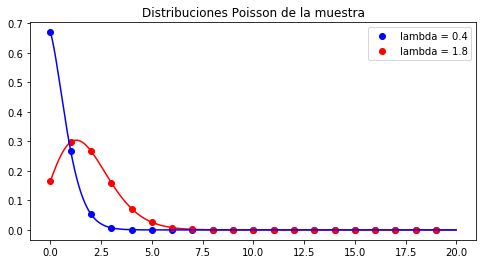

In [34]:
t = np.arange(0, 20, 0.01)
p = np.arange(0, 20, 1)
d_1 = np.exp(-lams[0])*np.power(lams[0], t)/factorial(t)
d_2 = np.exp(-lams[1])*np.power(lams[1], t)/factorial(t)
v_1 = np.exp(-lams[0])*np.power(lams[0], p)/factorial(p)
v_2 = np.exp(-lams[1])*np.power(lams[1], p)/factorial(p)

plt.figure(figsize=(8, 4))
plt.plot(p, v_2, 'ro', color='blue', label='lambda = 0.4')
plt.plot(p, v_1, 'ro', label='lambda = 1.8')
plt.plot(t, d_1, 'red')
plt.plot(t, d_2, 'blue')
plt.title('Distribuciones Poisson de la muestra')
plt.legend();

El punto medio ($m$), calculado es 0.93; eso significa que el clasificador asigna la clase 1 a los valores mayores o iguales que 1, y al valor cero siempre le asigna la clase 2, pues estamos trabajando con valores discretos. Luego podemos calcular el error usando la formula del inciso b):

Recordemos que $\displaystyle\sum^{\infty}_{i=0} \frac{x^i}{i!} = e^x$ (*). 

Luego:

$$P(Error) = 0.5\times \sum_{x=0}^{0}{e^{-1.8}\displaystyle\frac{1.8^x}{x!}} + 0.5 \times \sum_{x=1}^{\infty}{e^{-0.4}\displaystyle\frac{0.4^x}{x!}} = 0.5 \times (e^{-1.8}  + \sum_{x=0}^{\infty}{e^{-0.4}\displaystyle\frac{0.4^x}{x!}} - e^{-0.4}) = 0.5 \times  0.4949788 = 0.2475$$

<br>
<br>